In [281]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean, stdev

# data partition
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import power_transform

# models
from sklearn.linear_model import LogisticRegression

# metric
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# oversampling
from imblearn.over_sampling import RandomOverSampler

# Kfold
from sklearn.model_selection import StratifiedKFold

# scale
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

## Preprocessing

In [282]:
# open the dataset
df = pd.read_csv('train.csv')
df.head(3)

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy
0,102863333,21-Mar-20,0,0.0,0,0.0,3,64.0,0.0000,0.0667,0.0,MacOSX,2,Portugal,1,Returner,0
1,103117814,20-May-20,0,0.0,0,0.0,23,684.5,0.0217,0.0449,0.0,Windows,2,France,6,Returner,0
2,103201891,4-Dec-20,0,0.0,0,0.0,8,95.0,0.0250,0.0583,0.0,Windows,4,Italy,1,Returner,0


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Access_ID                   9999 non-null   int64  
 1   Date                        9999 non-null   object 
 2   AccountMng_Pages            9999 non-null   int64  
 3   AccountMng_Duration         9999 non-null   float64
 4   FAQ_Pages                   9999 non-null   int64  
 5   FAQ_Duration                9999 non-null   float64
 6   Product_Pages               9999 non-null   int64  
 7   Product_Duration            9999 non-null   float64
 8   GoogleAnalytics_BounceRate  9999 non-null   float64
 9   GoogleAnalytics_ExitRate    9999 non-null   float64
 10  GoogleAnalytics_PageValue   9999 non-null   float64
 11  OS                          9999 non-null   object 
 12  Browser                     9999 non-null   int64  
 13  Country                     9999 

In [284]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Access_ID,9999.0,4.519728e+08,2.024990e+08,102863333.0,2.731950e+08,4.536169e+08,6.259756e+08,7.984440e+08
AccountMng_Pages,9999.0,2.324232e+00,3.340676e+00,0.0,0.000000e+00,1.000000e+00,4.000000e+00,2.700000e+01
AccountMng_Duration,9999.0,8.120585e+01,1.797155e+02,0.0,0.000000e+00,7.500000e+00,9.220835e+01,3.398750e+03
FAQ_Pages,9999.0,5.080508e-01,1.279390e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01
FAQ_Duration,9999.0,3.455910e+01,1.397970e+02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,2.549375e+03
Product_Pages,9999.0,3.168587e+01,4.455028e+01,0.0,7.000000e+00,1.800000e+01,3.800000e+01,7.050000e+02
Product_Duration,9999.0,1.199769e+03,1.958276e+03,0.0,1.835625e+02,5.990000e+02,1.470271e+03,6.397352e+04
GoogleAnalytics_BounceRate,9999.0,2.230545e-02,4.877597e-02,0.0,0.000000e+00,3.200000e-03,1.680000e-02,2.000000e-01
GoogleAnalytics_ExitRate,9999.0,4.318147e-02,4.884528e-02,0.0,1.430000e-02,2.510000e-02,5.000000e-02,2.000000e-01
GoogleAnalytics_PageValue,9999.0,5.963120e+00,1.875363e+01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,3.617637e+02


In [285]:
# data types transformation
# Converting Date type from object to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')
df["Month"]=df["Date"].map(lambda x: x.month)
df["Months_high"]=df["Month"].map(lambda x: 1 if x>7 & x<12 else 0)
df["Months_high"]

0       0
1       0
2       1
3       1
4       1
       ..
9994    0
9995    0
9996    0
9997    0
9998    1
Name: Months_high, Length: 9999, dtype: int64

## unbalenced data

In [286]:
df['Buy'].value_counts()

0    8447
1    1552
Name: Buy, dtype: int64

## New features

In [287]:
# type of OS: mobile or computer
df['OS'].unique()

array(['MacOSX', 'Windows', 'Android', 'Ubuntu', 'iOS', 'Other', 'Fedora',
       'Chrome OS'], dtype=object)

In [288]:
# 0 - PC/ 1 - Mobile
dict_os = {'MacOSX': 0, 'Windows': 0, 'Android': 0, 'Ubuntu': 0, 'iOS': 1, 'Other': 0, 'Fedora': 0, 'Chrome OS':0}
df['OS_type'] = df['OS'].map(dict_os)

In [289]:
# Type of Visitor
df['Type_of_Visitor'].value_counts()

Returner      8534
New_Access    1391
Other           74
Name: Type_of_Visitor, dtype: int64

In [290]:
# 0 - Returner/ 1 - New_Access/ 2 - Other
dict_visitor = {'Returner': 0, 'New_Access': 1, 'Other': 0}

df['Type_of_Visitor_type'] = df['Type_of_Visitor'].map(dict_visitor)

In [291]:
# Type of Traffic
df['Type_of_Traffic'].value_counts()

2     3150
1     2008
3     1676
4      870
13     595
10     355
6      354
8      284
5      210
11     205
15     156
12      44
9       34
7       31
14      27
Name: Type_of_Traffic, dtype: int64

In [292]:
df["Type_of_Traffic_high"]=df["Type_of_Traffic"].map(lambda x: 1 if (x in [7,8,15]) else 0)
df["Type_of_Traffic_high"].value_counts()

0    9528
1     471
Name: Type_of_Traffic_high, dtype: int64

## Remove Outliers

In [293]:
# trashold for outliers
filters1 = (
    (df['AccountMng_Duration']<=2000)
    &
    (df['FAQ_Duration']<=1500)
    &
    (df['Product_Pages']<=500)
    &
    (df['Product_Duration']<=25000)
    &
    (df['GoogleAnalytics_PageValue']<=300)
)

df_1 = df[filters1]

print('Percentage of data kept after removing outliers:', np.round(df_1.shape[0] / df.shape[0], 4))

df = df[filters1]

Percentage of data kept after removing outliers: 0.9973


In [294]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Access_ID,9972.0,4.521602e+08,2.025858e+08,102863333.0,2.733227e+08,4.539848e+08,6.263382e+08,7.984440e+08
AccountMng_Pages,9972.0,2.306558e+00,3.308251e+00,0.0,0.000000e+00,1.000000e+00,4.000000e+00,2.600000e+01
AccountMng_Duration,9972.0,7.918739e+01,1.671393e+02,0.0,0.000000e+00,7.000000e+00,9.175000e+01,1.951279e+03
FAQ_Pages,9972.0,4.972924e-01,1.237795e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.600000e+01
FAQ_Duration,9972.0,3.133000e+01,1.174612e+02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.494500e+03
Product_Pages,9972.0,3.110961e+01,4.141405e+01,0.0,7.000000e+00,1.800000e+01,3.800000e+01,4.700000e+02
Product_Duration,9972.0,1.166473e+03,1.682319e+03,0.0,1.825625e+02,5.972917e+02,1.460652e+03,2.388881e+04
GoogleAnalytics_BounceRate,9972.0,2.235188e-02,4.883266e-02,0.0,0.000000e+00,3.200000e-03,1.690000e-02,2.000000e-01
GoogleAnalytics_ExitRate,9972.0,4.324573e-02,4.889256e-02,0.0,1.430000e-02,2.520000e-02,5.000000e-02,2.000000e-01
GoogleAnalytics_PageValue,9972.0,5.894852e+00,1.808925e+01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,2.879538e+02


## Correlation

In [71]:
df.columns

Index(['Access_ID', 'Date', 'AccountMng_Pages', 'AccountMng_Duration',
       'FAQ_Pages', 'FAQ_Duration', 'Product_Pages', 'Product_Duration',
       'GoogleAnalytics_BounceRate', 'GoogleAnalytics_ExitRate',
       'GoogleAnalytics_PageValue', 'OS', 'Browser', 'Country',
       'Type_of_Traffic', 'Type_of_Visitor', 'Buy', 'OS_type',
       'Type_of_Visitor_type'],
      dtype='object')

In [295]:
# Define metric and non-metric features
non_metric_features = ['Access_ID', 'Date', 'OS', 'Browser', 'Country','Type_of_Traffic', 'Type_of_Visitor',
                       'Buy', 'OS_type', 'Type_of_Visitor_type']
metric_features = df.columns.drop(non_metric_features).to_list()

In [296]:
def cor_heatmap(cor, ax):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1', ax=ax)
    plt.show()

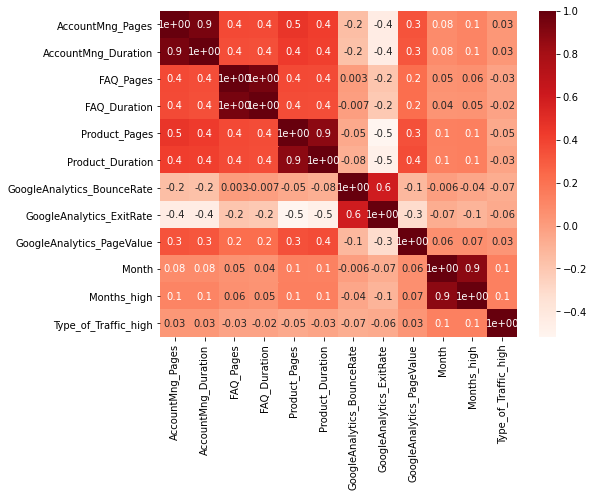

<Figure size 864x720 with 0 Axes>

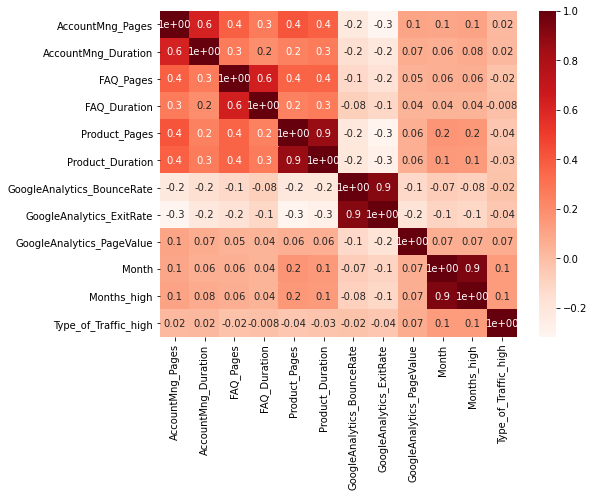

<Figure size 864x720 with 0 Axes>

In [297]:
#build correlation matrix
cor_spearman = df[metric_features].corr(method ='spearman')
# cor_spearman

cor_pearson = df[metric_features].corr(method='pearson')

fig, ax1 = plt.subplots(1,1, figsize=(8,6))
cor_heatmap(cor_spearman, ax1)
fig, ax1 = plt.subplots(1,1, figsize=(8,6))
cor_heatmap(cor_pearson, ax1)

## Dataset for Logistic Reg2

In [298]:
df.columns

Index(['Access_ID', 'Date', 'AccountMng_Pages', 'AccountMng_Duration',
       'FAQ_Pages', 'FAQ_Duration', 'Product_Pages', 'Product_Duration',
       'GoogleAnalytics_BounceRate', 'GoogleAnalytics_ExitRate',
       'GoogleAnalytics_PageValue', 'OS', 'Browser', 'Country',
       'Type_of_Traffic', 'Type_of_Visitor', 'Buy', 'Month', 'Months_high',
       'OS_type', 'Type_of_Visitor_type', 'Type_of_Traffic_high'],
      dtype='object')

In [151]:
#df_log1 = df[['AccountMng_Duration', 'Product_Pages', 'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue',
#              'Buy']]

In [299]:
df_log2 = df[[ "Type_of_Traffic_high","Months_high","Type_of_Visitor_type",'GoogleAnalytics_ExitRate',  'GoogleAnalytics_PageValue',"Buy"]]

In [300]:
X = df_log2.drop('Buy', axis=1)
y = df_log2['Buy']

In [301]:
X

,Type_of_Traffic_high,Months_high,Type_of_Visitor_type,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue
0,0,0,0,0.0667,0.0000
1,0,0,0,0.0449,0.0000
2,0,1,0,0.0583,0.0000
3,0,1,0,0.0250,42.4225
4,0,1,0,0.0093,12.5033
...,...,...,...,...,...
9994,0,0,0,0.0111,0.0000
9995,0,0,1,0.0111,0.0000
9996,0,0,0,0.0519,0.0000
9997,0,0,0,0.0363,0.0000


## Balance the training set - test Oversampling

In [302]:
# split the dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=5, stratify=y)

In [303]:
# Before Oversampling
print('X:', X_train.shape)
print('y:', y_train.shape)
y_train.value_counts()

X: (6980, 5)
y: (6980,)


0    5900
1    1080
Name: Buy, dtype: int64

In [304]:
#oversample only training data
ros = RandomOverSampler(random_state=6)
X_train_over, y_train_over = ros.fit_resample(X_train, y_train)

In [305]:
# After Oversampling
print('X_over:', X_train_over.shape)
print('y_over:', y_train_over.shape)
y_train_over.value_counts()

X_over: (11800, 5)
y_over: (11800,)


0    5900
1    5900
Name: Buy, dtype: int64

# Variable transformations after train_test_split

In [306]:
X_train_over["GoogleAnalytics_PageValue"]= power_transform(np.array(X_train_over.GoogleAnalytics_PageValue).reshape(-1, 1), method='yeo-johnson')
X_val["GoogleAnalytics_PageValue"]= power_transform(np.array(X_val.GoogleAnalytics_PageValue).reshape(-1, 1), method='yeo-johnson')

## Scale - MaxMin

In [27]:
# X_train.columns

In [28]:
# # Define metric and non-metric features
# non_metric_features = ['Type_of_Traffic', 'OS_type', 'Type_of_Visitor_type']
# metric_features = X_over.columns.drop(non_metric_features).to_list()

# print(non_metric_features)
# print(metric_features)

In [29]:
# #separate numeric and non-numeric
# X_train_num = X_train[metric_features]
# X_train_cat = X_train[non_metric_features]
# # DO IT for validation
# X_val_num = X_val[metric_features]
# X_val_cat = X_val[non_metric_features]

In [30]:
# scaler = MinMaxScaler().fit(X_train_num)
# X_train_num_scaled = scaler.transform(X_train_num) # this will return an array
# # Convert the array to a pandas dataframe
# X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns).set_index(X_train.index)
# X_val_num_scaled = scaler.transform(X_val_num)
# X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns = X_val_num.columns).set_index(X_val.index)

In [31]:
# X_train_scaled = pd.concat([X_train_num_scaled, X_train_cat], axis=1)
# X_val_scaled = pd.concat([X_val_num_scaled, X_val_cat], axis=1)

## Logistic Model

In [307]:
model_log = LogisticRegression(class_weight='balanced').fit(X_train_over, y_train_over)

y_pred_train = model_log.predict(X_train_over)
y_pred_val = model_log.predict(X_val)

In [308]:
model_log.coef_

array([[ 0.82179519,  1.28892916,  0.40947224, -6.09960176,  1.95101254]])

In [309]:
# evaluation:
print('confusion matrix')
print(confusion_matrix(y_val, y_pred_val))

print('accuracy:', accuracy_score(y_val, y_pred_val))
print('precision:', precision_score(y_val, y_pred_val))
print('recall:', recall_score(y_val, y_pred_val))
print('f1_train:', f1_score(y_train_over, y_pred_train))
print('f1_val:', f1_score(y_val, y_pred_val))

confusion matrix
[[2038  491]
 [  66  397]]
accuracy: 0.8138368983957219
precision: 0.44707207207207206
recall: 0.857451403887689
f1_train: 0.8331849741855084
f1_val: 0.5877128053293856


In [310]:
#low precision can be improved by increasing your threshold, making your model less sensitive
y_pred_new_threshold = (model_log.predict_proba(X_val)[:,1]>=0.96).astype(int)
y_pred_new_threshold
print(confusion_matrix(y_val, y_pred_new_threshold))
print('precision:', precision_score(y_val, y_pred_new_threshold))
print('f1_val:', f1_score(y_val, y_pred_new_threshold))

[[2357  172]
 [ 149  314]]
precision: 0.6460905349794238
f1_val: 0.6617492096944152


## Dataset for test

In [264]:
test_set = pd.read_csv('test.csv')
# test_set.set_index('Access_ID', inplace = True)

In [265]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Access_ID                   2300 non-null   int64  
 1   Date                        2300 non-null   object 
 2   AccountMng_Pages            2300 non-null   int64  
 3   AccountMng_Duration         2300 non-null   float64
 4   FAQ_Pages                   2300 non-null   int64  
 5   FAQ_Duration                2300 non-null   float64
 6   Product_Pages               2300 non-null   int64  
 7   Product_Duration            2300 non-null   float64
 8   GoogleAnalytics_BounceRate  2300 non-null   float64
 9   GoogleAnalytics_ExitRate    2300 non-null   float64
 10  GoogleAnalytics_PageValue   2300 non-null   float64
 11  OS                          2300 non-null   object 
 12  Browser                     2300 non-null   int64  
 13  Country                     2300 

In [266]:
test_set.head()

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor
0,798519314,24-Aug-20,0,0.00,0,0.0,86,5332.5478,0.0139,0.0654,0.0000,Windows,2,Brazil,1,Returner
1,798663101,25-May-20,2,37.50,0,0.0,55,1420.4725,0.0012,0.0058,0.0000,Android,1,Spain,4,Returner
2,798663221,2-Nov-20,0,0.00,0,0.0,36,788.5000,0.0000,0.0250,0.0000,Windows,6,Spain,3,Returner
3,798760918,14-May-20,0,0.00,0,0.0,2,689.0000,0.0000,0.1000,0.0000,Windows,2,Spain,2,New_Access
4,798856982,5-Nov-20,12,225.25,1,0.0,129,3367.0413,0.0014,0.0185,1.0353,Windows,4,Portugal,10,Returner


In [267]:
test_set.describe().T

,count,mean,std,min,25%,50%,75%,max
Access_ID,2300.0,8.804779e+08,4.702750e+07,798519314.0,8.401491e+08,8.804244e+08,9.208468e+08,9.622187e+08
AccountMng_Pages,2300.0,2.290000e+00,3.252300e+00,0.0,0.000000e+00,1.000000e+00,4.000000e+00,2.300000e+01
AccountMng_Duration,2300.0,7.978093e+01,1.644476e+02,0.0,0.000000e+00,8.550000e+00,9.785000e+01,2.720500e+03
FAQ_Pages,2300.0,4.865217e-01,1.234311e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01
FAQ_Duration,2300.0,3.426683e+01,1.455007e+02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,2.252033e+03
Product_Pages,2300.0,3.192870e+01,4.415023e+01,0.0,8.000000e+00,1.800000e+01,3.800000e+01,5.340000e+02
Product_Duration,2300.0,1.172039e+03,1.702731e+03,0.0,1.868750e+02,5.986893e+02,1.439535e+03,1.850413e+04
GoogleAnalytics_BounceRate,2300.0,2.170235e-02,4.721379e-02,0.0,0.000000e+00,2.900000e-03,1.675000e-02,2.000000e-01
GoogleAnalytics_ExitRate,2300.0,4.256478e-02,4.753867e-02,0.0,1.427500e-02,2.520000e-02,5.000000e-02,2.000000e-01
GoogleAnalytics_PageValue,2300.0,5.588465e+00,1.778171e+01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,2.585499e+02


In [39]:
test_set['Type_of_Visitor'].unique()
test_set['OS'].unique()

array(['Windows', 'Android', 'MacOSX', 'iOS', 'Fedora', 'Chrome OS',
       'Other', 'Ubuntu'], dtype=object)

In [269]:
# select the columns for the model

# 0 - PC/ 1 - Mobile
dict_os = {'MacOSX': 0, 'Windows': 0, 'Android': 0, 'Ubuntu': 0, 'iOS': 1, 'Other': 0, 'Fedora': 0, 'Chrome OS':0}
test_set['OS_type'] = test_set['OS'].map(dict_os)

# 0 - Returner/ 1 - New_Access/ 2 - Other
dict_visitor = {'Returner': 0, 'New_Access': 1, 'Other': 0}
test_set['Type_of_Visitor_type'] = test_set['Type_of_Visitor'].map(dict_visitor)

#months variable
test_set['Date'] = pd.to_datetime(test_set['Date'], format='%d-%b-%y')
test_set["Month"]=test_set["Date"].map(lambda x: x.month)
test_set["Months_high"]=test_set["Month"].map(lambda x: 1 if x>7 & x<12 else 0)

#type of traffic
test_set["Type_of_Traffic_high"]=test_set["Type_of_Traffic"].map(lambda x: 1 if (x in [7,8,15]) else 0)
test_set["Type_of_Traffic_high"].value_counts()

test_set["GoogleAnalytics_PageValue"]= power_transform(np.array(test_set.GoogleAnalytics_PageValue).reshape(-1, 1), method='yeo-johnson')

test = test_set[["Type_of_Traffic_high","Months_high","Type_of_Visitor_type",'GoogleAnalytics_ExitRate',  'GoogleAnalytics_PageValue']]

In [270]:
test.columns

Index(['Type_of_Traffic_high', 'Months_high', 'Type_of_Visitor_type',
       'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue'],
      dtype='object')

In [271]:
y_pred_test = model_log.predict(test)

In [276]:
y_pred_new_threshold = (model_log.predict_proba(test)[:,1]>=0.96).astype(int)

In [278]:
df_submission = pd.concat([test_set['Access_ID'], pd.DataFrame(columns=['Buy'], data=y_pred_new_threshold)], axis=1)

In [279]:
df_submission['Buy'].value_counts()

0    1889
1     411
Name: Buy, dtype: int64

In [280]:
df_submission.to_csv('logistic_over_noscale_lessfeatures_newfeats_newthresh.csv', index=False)